In [1]:
#import library
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D

# German Credit 

In [2]:
#load dataset
df_credit = pd.read_csv('german_credit_data.csv')

In [3]:
#show 5 rows ahead of dataset
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## Exploratory Data Analysis (EDA)

In [4]:
#check total rows and columns
df_credit.shape

(1000, 10)

In [5]:
#check missing value
df_credit.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [6]:
#drop Unnamed: 0 column
df_credit = df_credit.drop('Unnamed: 0', axis = 1)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [7]:
#show info of dataset
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [8]:
#handling missing value
for i in df_credit[['Saving accounts', 'Checking account']]:
    df_credit[i] = df_credit[i].fillna(df_credit[i].mode().values[0])
    
df_credit.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [9]:
#describe dataset
df_credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


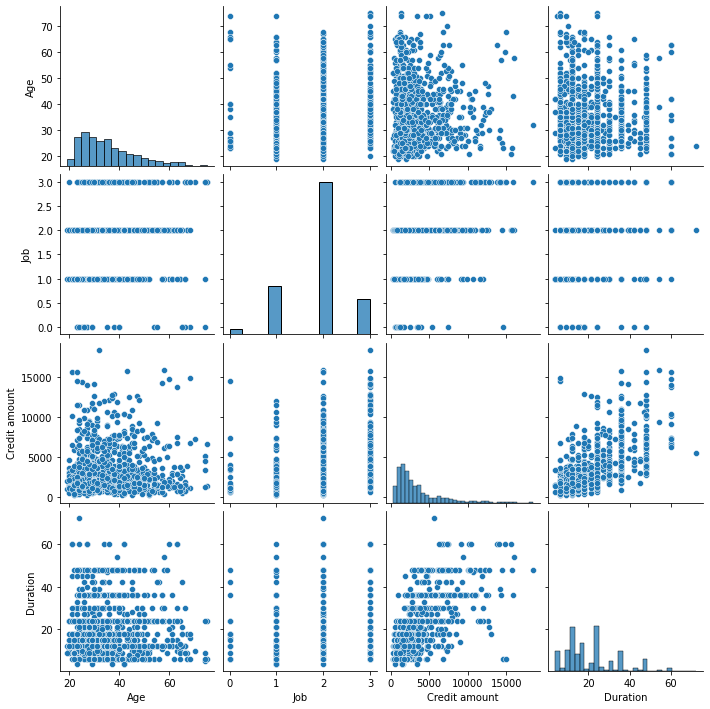

In [10]:
#visualize for compare each attributes 
sns.pairplot(df_credit)
plt.show()

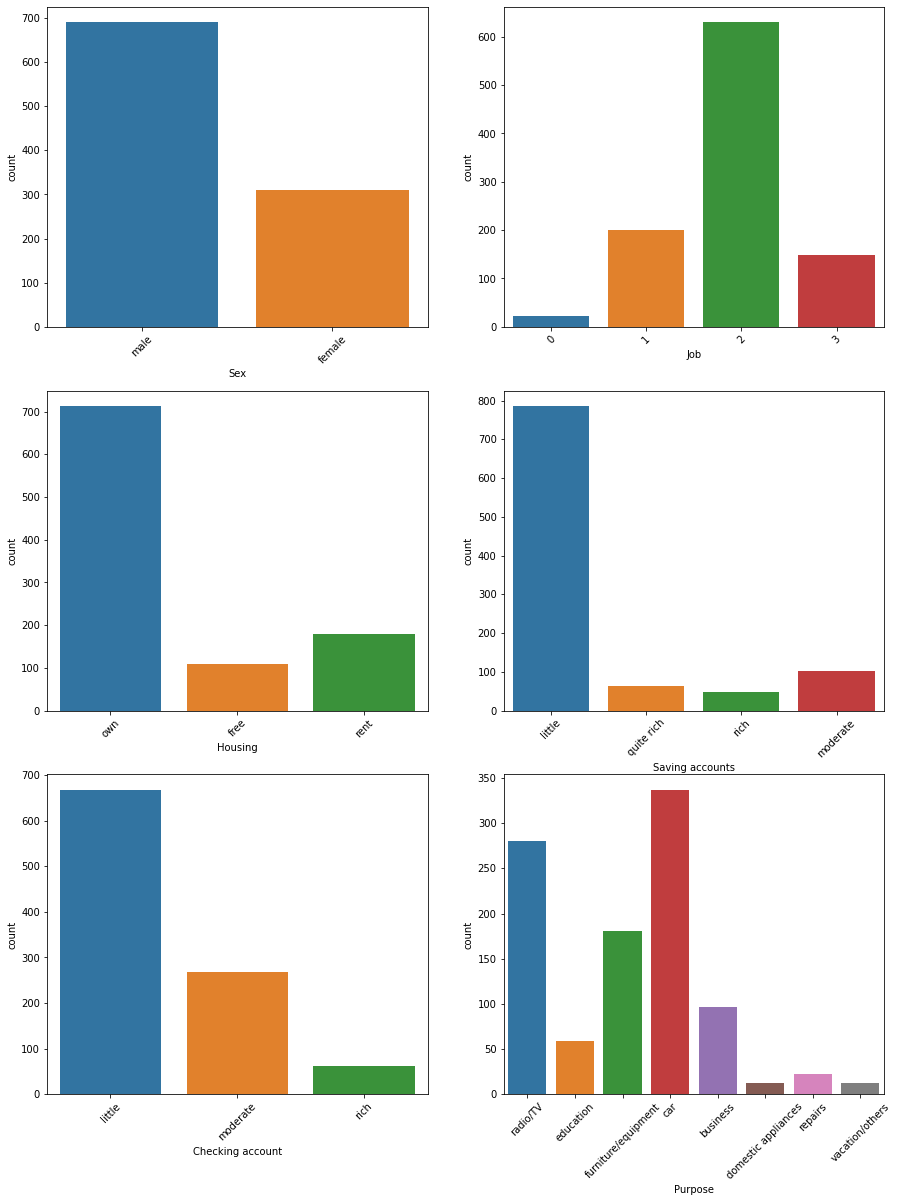

In [11]:
#visualize number of each attributes of dataset
fig = plt.figure(figsize = (15,20))
axes = 320

for i in df_credit[['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']]:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df_credit, x = i)
    plt.xticks(rotation = 45)
    
plt.show()

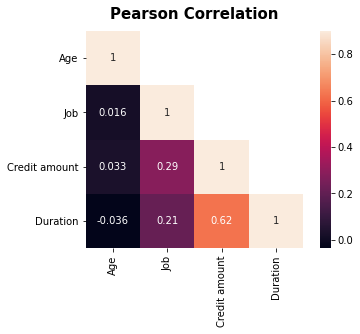

In [12]:
#create correlation
corr = df_credit.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig.set_size_inches(15,15)
plt.title('Pearson Correlation', fontsize = 15, pad = 12, fontweight = 'bold')
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)
plt.show()

In [13]:
#create dataframe to check cluster
df_cluster = pd.DataFrame()
df_cluster['Credit amount'] = df_credit['Credit amount']
df_cluster['Age'] = df_credit['Age']
df_cluster['Duration'] = df_credit['Duration']
df_cluster['Job'] = df_credit['Job']
df_cluster.head()

,Credit amount,Age,Duration,Job
0,1169,67,6,2
1,5951,22,48,2
2,2096,49,12,1
3,7882,45,42,2
4,4870,53,24,2


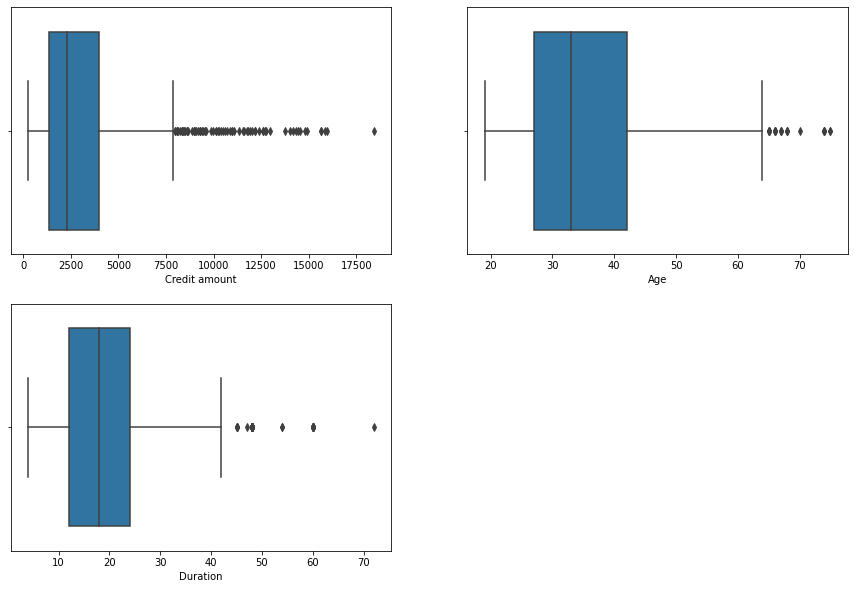

In [14]:
#visualize outlier of each attributes
fig = plt.figure(figsize = (15,10))
axes = 220

for i in df_credit[['Credit amount', 'Age', 'Duration']]:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df_credit, x = i)
plt.show()

No handles with labels found to put in legend.


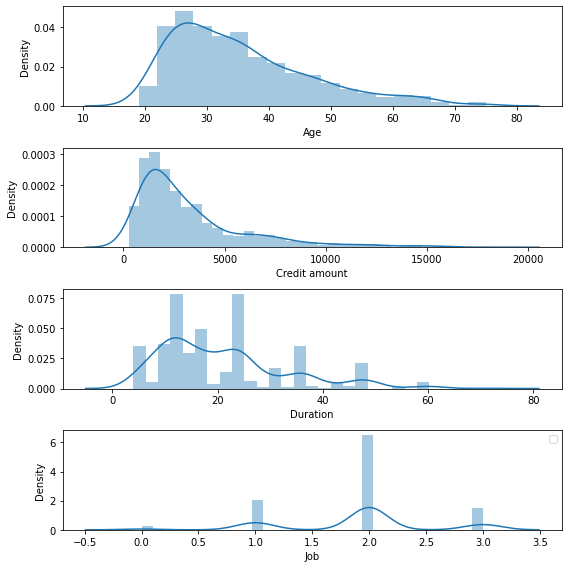

In [15]:
#visualize distribution of each variables 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (8,8))
sns.distplot(df_credit['Age'], ax = ax1)
sns.distplot(df_credit['Credit amount'], ax = ax2)
sns.distplot(df_credit['Duration'], ax = ax3)
sns.distplot(df_credit['Job'], ax = ax4)
plt.tight_layout()
plt.legend()

No handles with labels found to put in legend.


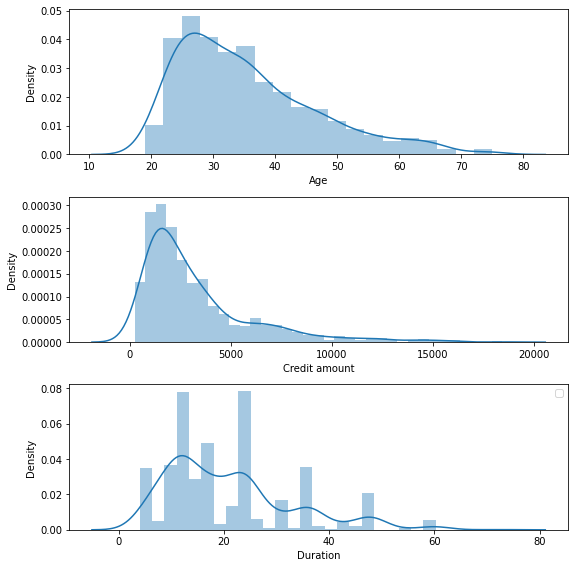

In [16]:
#feature engineering
df_cluster_log = np.log(df_cluster[['Age', 'Credit amount', 'Duration']])

#visualize distribution
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (8,8))
sns.distplot(df_credit['Age'], ax = ax1)
sns.distplot(df_credit['Credit amount'], ax = ax2)
sns.distplot(df_credit['Duration'], ax = ax3)
plt.tight_layout()
plt.legend()

In [17]:
#check cluster distribution skewness
df_cluster_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


## Hierarchical Clustering

In [18]:
#feature scaling
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)
print(cluster_scaled)

[[ 2.27100592 -0.933901   -1.86486906]
 [-1.44615223  1.16304581  1.7083687 ]
 [ 1.22669602 -0.1815588  -0.67378981]
 ...
 [ 0.37810951 -1.4161991  -0.67378981]
 [-1.29778048 -0.34591111  1.59746802]
 [-0.76258638  0.82450846  1.59746802]]


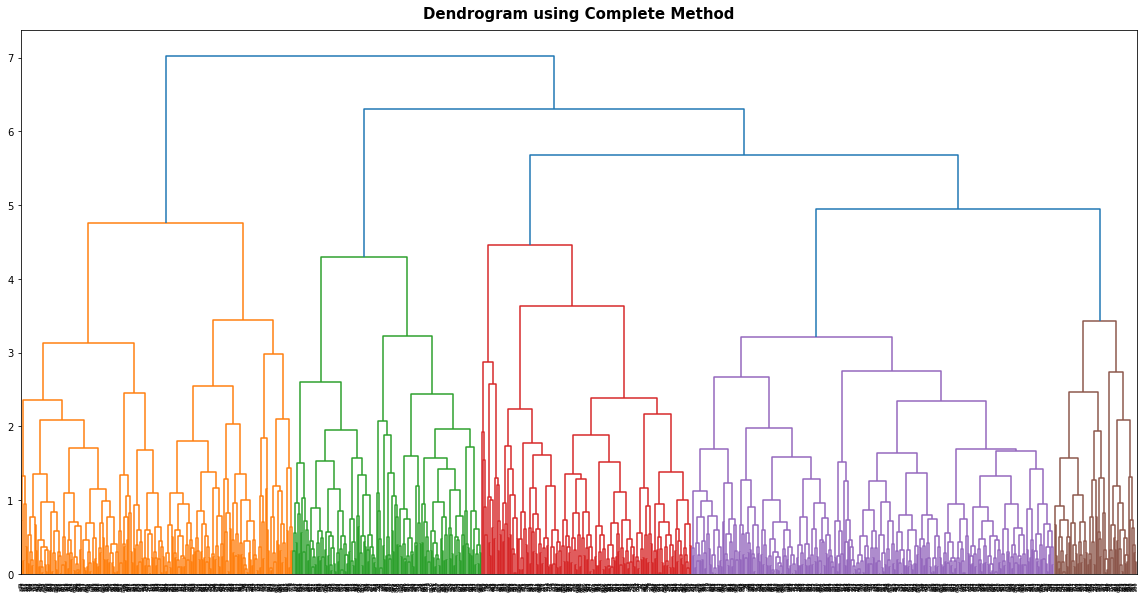

In [19]:
#visualize dendrogram
plt.figure(figsize = (20,10))
plt.title('Dendrogram using Complete Method', fontsize = 15, pad = 12, fontweight = 'bold')
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method = 'complete', metric = 'euclidean'))

In [20]:
#build model
model = AgglomerativeClustering(n_clusters = 4)
model.fit(cluster_scaled)

AgglomerativeClustering(n_clusters=4)

In [21]:
#prediction
hac_labels = model.labels_
print(hac_labels)

[2 0 2 0 0 0 0 0 2 1 3 1 3 2 3 1 0 0 0 1 2 2 2 2 3 2 2 2 2 0 1 1 0 2 2 1 0
 1 2 3 1 3 0 1 0 2 1 3 0 2 1 0 3 1 2 3 0 0 1 1 3 2 2 0 1 0 2 3 1 1 0 2 2 0
 1 2 0 0 0 1 0 2 1 2 2 2 3 0 1 3 2 2 2 1 2 0 2 1 1 0 1 1 3 2 1 0 0 1 0 2 3
 3 0 0 2 0 0 3 1 2 1 0 3 2 1 2 2 2 2 1 0 0 1 2 0 2 0 2 1 2 3 0 1 1 1 1 2 2
 0 2 2 2 1 0 0 3 2 2 0 3 1 1 2 0 1 2 1 3 1 1 1 3 1 2 1 0 2 2 2 2 0 0 1 0 1
 1 0 2 3 1 0 0 0 3 1 2 3 3 1 0 2 3 1 3 2 0 2 3 0 2 2 0 0 2 0 2 1 1 1 2 3 3
 2 1 1 1 0 0 3 1 1 2 2 3 2 1 1 0 2 1 1 2 1 3 2 1 2 2 1 3 2 2 1 0 3 0 1 2 1
 2 2 2 0 2 2 1 0 1 0 1 1 2 0 1 0 2 1 2 2 1 1 2 2 2 0 0 1 0 2 2 3 0 0 0 0 0
 1 2 0 1 2 0 1 2 0 3 1 2 3 3 0 1 1 3 3 1 2 0 2 1 1 1 1 1 1 2 0 1 0 3 0 1 0
 0 1 2 3 3 1 2 1 1 1 0 2 2 3 1 3 2 3 3 0 1 2 1 2 1 3 1 2 2 2 3 1 2 1 1 0 0
 0 0 3 0 0 0 1 2 0 2 0 0 1 3 1 1 3 0 1 3 1 3 0 3 2 0 2 0 2 1 1 1 0 3 0 1 0
 3 1 3 1 0 2 2 1 0 2 0 1 1 1 2 2 1 1 1 1 2 3 2 0 0 3 1 3 3 3 1 0 3 2 2 1 2
 0 2 1 2 2 2 0 3 2 1 0 1 2 2 3 0 0 1 2 2 1 0 1 0 1 0 1 3 3 2 1 1 1 1 2 2 1
 1 0 1 2 2 2 0 2 3 2 0 3 

Hierarchical Clustering


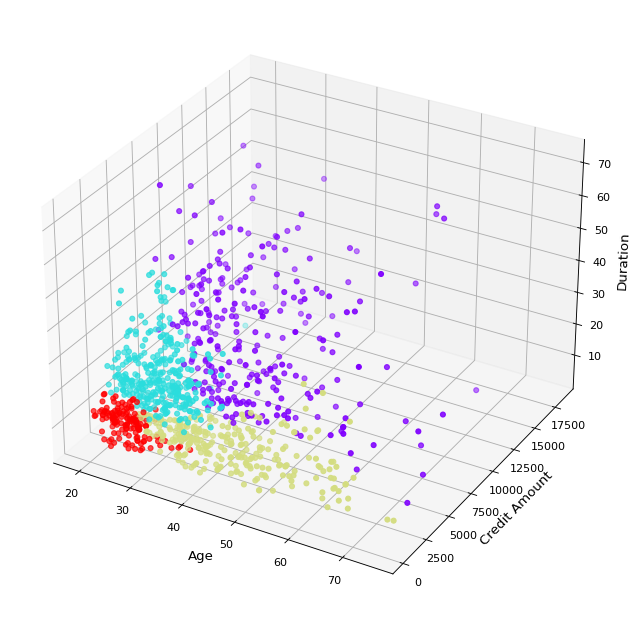

In [22]:
#visualize result of model using 3 dimension
fig = plt.figure(num = None, figsize = (15,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax = plt.axes(projection = '3d')
ax.scatter3D(df_cluster['Age'], df_cluster['Credit amount'], df_cluster['Duration'], c = hac_labels, cmap = 'rainbow')
xlabel = ax.set_xlabel('Age', linespacing = 3.2, fontsize = 12)
ylabel = ax.set_ylabel('Credit Amount', linespacing = 3.1, fontsize = 12)
zlabel = ax.set_zlabel('Duration', linespacing = 3.4, fontsize = 12)
print('Hierarchical Clustering')

In [23]:
#combining prediction result with original dataset
df_clustered_hac = df_cluster.assign(Cluster = hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Credit amount,Age,Duration,Job
Cluster,,,,
0,6477.0,40.4,32.0,2.2
1,2748.0,28.8,23.6,1.9
2,1644.1,44.0,11.7,1.7
3,1231.5,25.1,10.6,1.7


# Wholesale Customers

In [24]:
#load dataset
df_customer = pd.read_csv('Wholesale_customers_data.csv')

In [25]:
#show 5 rows ahead of dataset
df_customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [26]:
df_customer.shape

(440, 8)

## Hierarchical Clustering

In [27]:
#normalization of dataset
data_scaled = normalize(df_customer)
data_scaled = pd.DataFrame(data_scaled, columns = df_customer.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


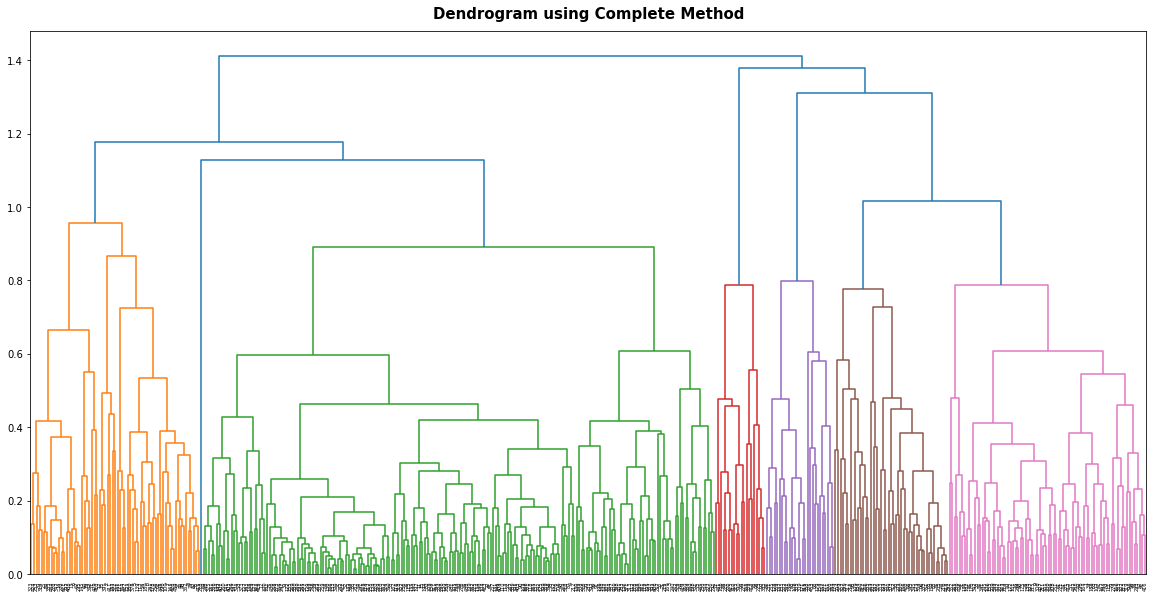

In [28]:
#visualize dendrogram
plt.figure(figsize = (20,10))
plt.title('Dendrogram using Complete Method', fontsize = 15, pad = 12, fontweight = 'bold')
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'complete', metric = 'euclidean'))

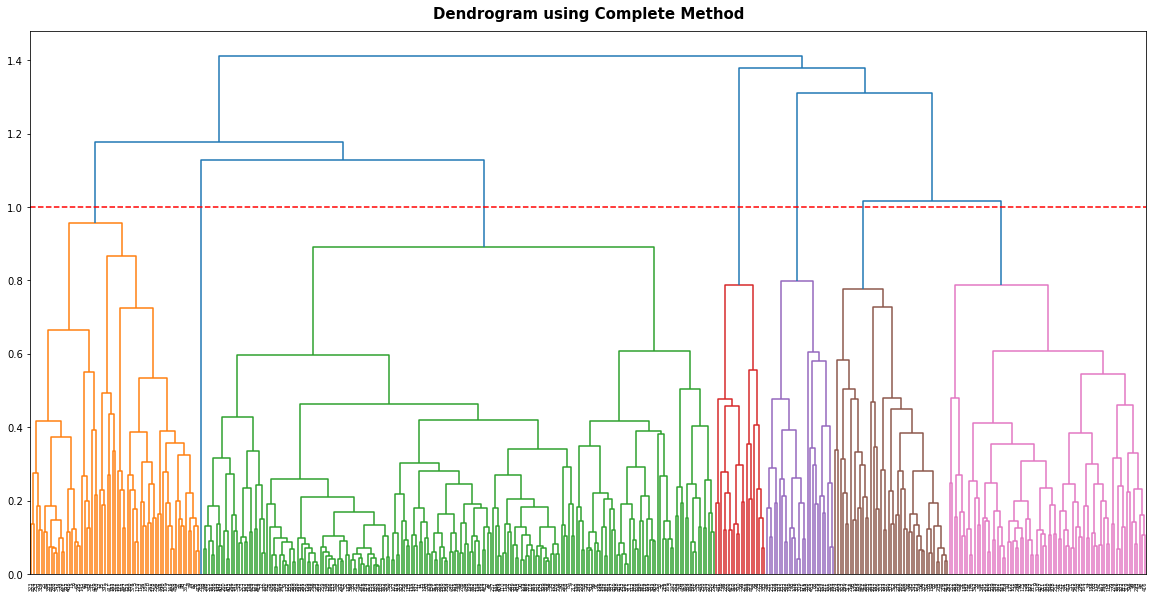

In [29]:
#visualize dendrogram with x-axis and y-axis distance
plt.figure(figsize = (20,10))
plt.title('Dendrogram using Complete Method', fontsize = 15, pad = 12, fontweight = 'bold')
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'complete', metric = 'euclidean'))
plt.axhline(y = 1.0, color = 'r', linestyle = '--')

In [30]:
#build model
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
print(cluster)

AgglomerativeClustering(linkage='complete')


In [31]:
#prediction
cluster.fit_predict(data_scaled)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,

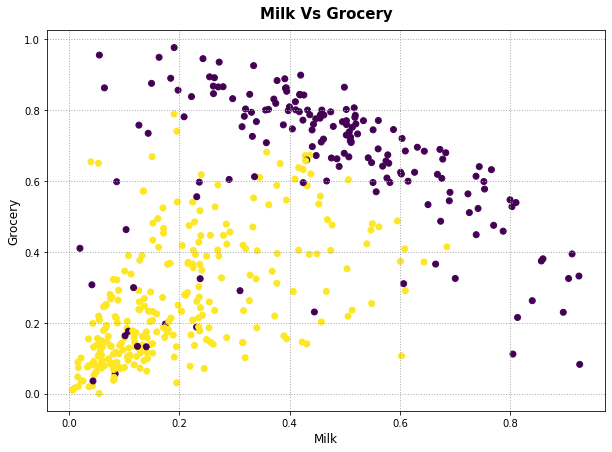

In [32]:
#visualize model with 2 cluster
plt.figure(figsize = (10,7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c = cluster.labels_)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 1)
plt.title('Milk Vs Grocery', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Milk', fontsize = 12)
plt.ylabel('Grocery', fontsize = 12)
plt.show()